In [1]:
!pip install matplotlib==3.10.3 seaborn==0.13.2


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\gbort\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter

In [3]:
df = pd.read_csv('top500_transformed.csv', index_col=0)

In [8]:
df['rating_value'] = df['rating_value'].str.replace(',', '.')
df['rating_value'] = pd.to_numeric(df['rating_value'], errors='coerce')

df['critic_rating_value'] = df['critic_rating_value'].str.replace(',', '.')
df['critic_rating_value'] = pd.to_numeric(df['critic_rating_value'], errors='coerce')

In [9]:
df.head()

,title,year,duration,rating_value,rating_count,critic_rating_value,critic_count,directors,screenwriters,production_countries,...,boxoffice_outside_usa,budget,genres,duration_minutes,world_premiere_parsed,polish_premiere_parsed,boxoffice_in$,boxoffice_usa_in$,boxoffice_outside_usa_in$,budget_in$
position,,,,,,,,,,,,,,,,,,,,,
1,The Shawshank Redemption,1994,2h 22m,8.8,955674,8.2,91,['Frank Darabont'],['Frank Darabont'],['USA'],...,$117 315,$25 000 000,['Dramat'],142,1994-09-10,1995-04-16,28884504.0,28767189.0,117315.0,25000000.0
2,The Green Mile,1999,3h 8m,8.6,1030633,7.2,73,['Frank Darabont'],['Frank Darabont'],['USA'],...,$150 000 000,$60 000 000,['Dramat'],188,1999-12-06,2000-03-24,286801374.0,136801374.0,150000000.0,60000000.0
3,Intouchables,2011,1h 52m,8.6,703261,7.1,86,"['Olivier Nakache', 'Éric Toledano']","['Olivier Nakache', 'Éric Toledano']",['Francja'],...,$416 389 690,$10 800 000,"['Biograficzny', 'Dramat', 'Komedia']",112,2011-09-23,2012-04-13,426588510.0,10198820.0,416389690.0,10800000.0
4,The Godfather,1972,2h 55m,8.6,566582,9.1,87,['Francis Ford Coppola'],"['Mario Puzo', 'Francis Ford Coppola']",['USA'],...,$113 960 743,$6 000 000,"['Dramat', 'Gangsterski']",175,1972-03-14,1972-12-31,250341816.0,136381073.0,113960743.0,6000000.0
5,12 Angry Men,1957,1h 36m,8.7,236509,8.9,86,['Sidney Lumet'],['Reginald Rose'],['USA'],...,NaN,NaN,['Dramat sądowy'],96,1957-04-10,1959-11-01,337000.0,NaN,NaN,NaN


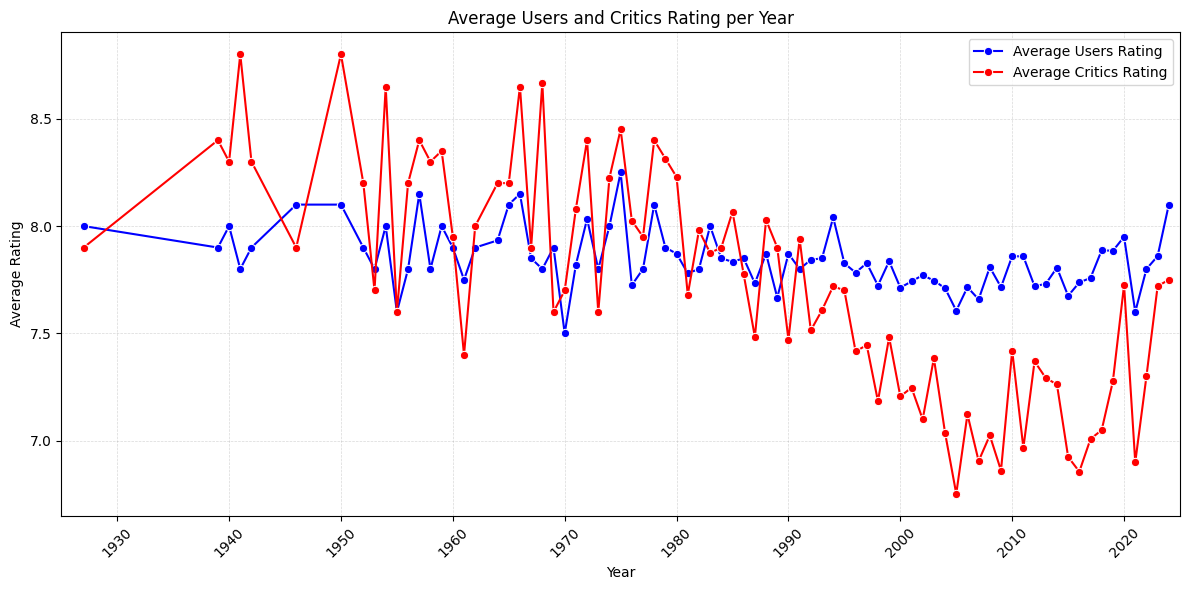

In [26]:
# Average critics rating per year
avg_critics_per_year = df.groupby('year')['critic_rating_value'].mean().reset_index()
# Average users rating per year
avg_rating_per_year = df.groupby('year')['rating_value'].mean().reset_index()

plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=avg_rating_per_year, x='year', y='rating_value', marker='o', color='blue', label='Average Users Rating')

sns.lineplot(data=avg_critics_per_year, x='year', y='critic_rating_value', marker='o', color='red', label='Average Critics Rating')

# Set ticks at 10-year intervals
start, end = avg_rating_per_year['year'].min(), avg_rating_per_year['year'].max()
ticks = list(range(start - start % 10, end + 10, 10))
ax.set_xticks(ticks)

# Add grid
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(1925, 2025)
plt.title('Average Users and Critics Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('ts_ratings.png', dpi=300, bbox_inches='tight')
plt.show()


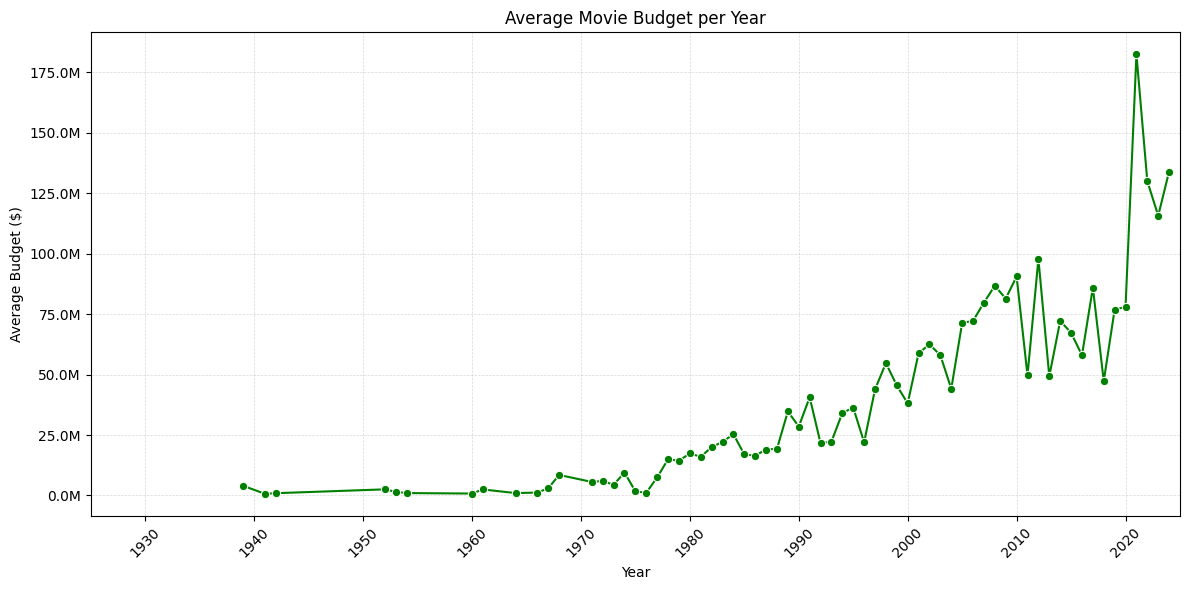

In [35]:
avg_budget_per_year = df.groupby('year')['budget_in$'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=avg_budget_per_year, x='year', y='budget_in$', marker='o', color='green')

formatter = FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

start, end = avg_budget_per_year['year'].min(), avg_budget_per_year['year'].max()
ticks = list(range(start - start % 10, end + 10, 10))
ax.set_xticks(ticks)

ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(1925, 2025)
plt.title('Average Movie Budget per Year')
plt.xlabel('Year')
plt.ylabel('Average Budget ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ts_budget.png', dpi=300, bbox_inches='tight')
plt.show()

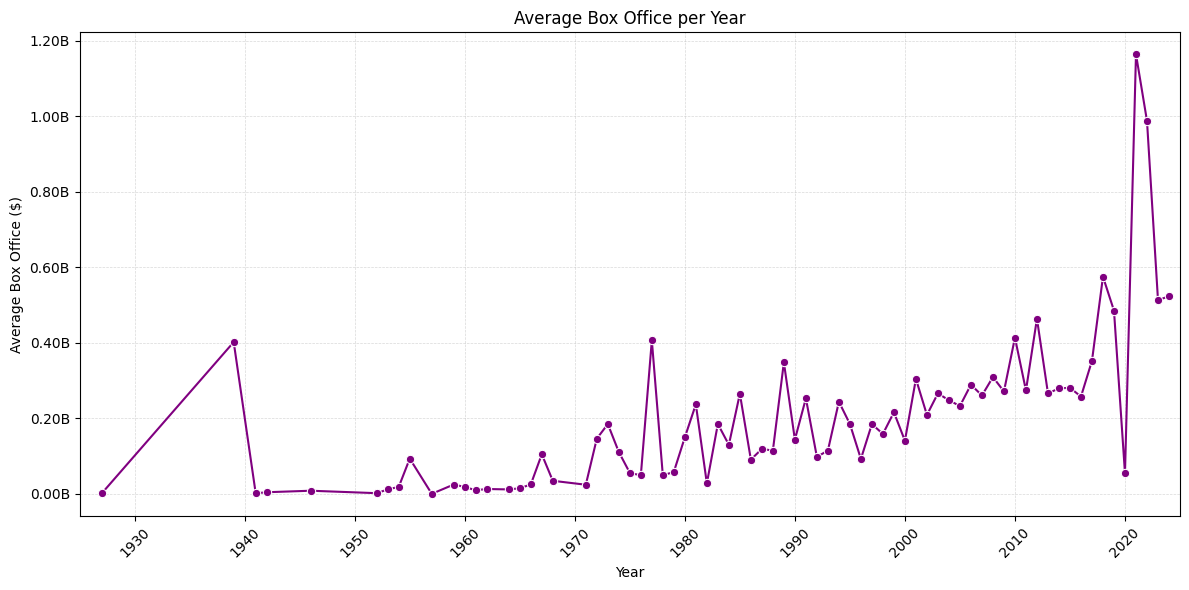

In [37]:
avg_boxoffice_per_year = df.groupby('year')['boxoffice_in$'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=avg_boxoffice_per_year, x='year', y='boxoffice_in$', marker='o', color='purple')

formatter = FuncFormatter(lambda x, _: f'{x/1e9:.2f}B')
ax.yaxis.set_major_formatter(formatter)

start, end = avg_boxoffice_per_year['year'].min(), avg_boxoffice_per_year['year'].max()
ticks = list(range(start - start % 10, end + 10, 10))
ax.set_xticks(ticks)

ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(1925, 2025)
plt.title('Average Box Office per Year')
plt.xlabel('Year')
plt.ylabel('Average Box Office ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ts_boxoffice.png', dpi=300, bbox_inches='tight')
plt.show()

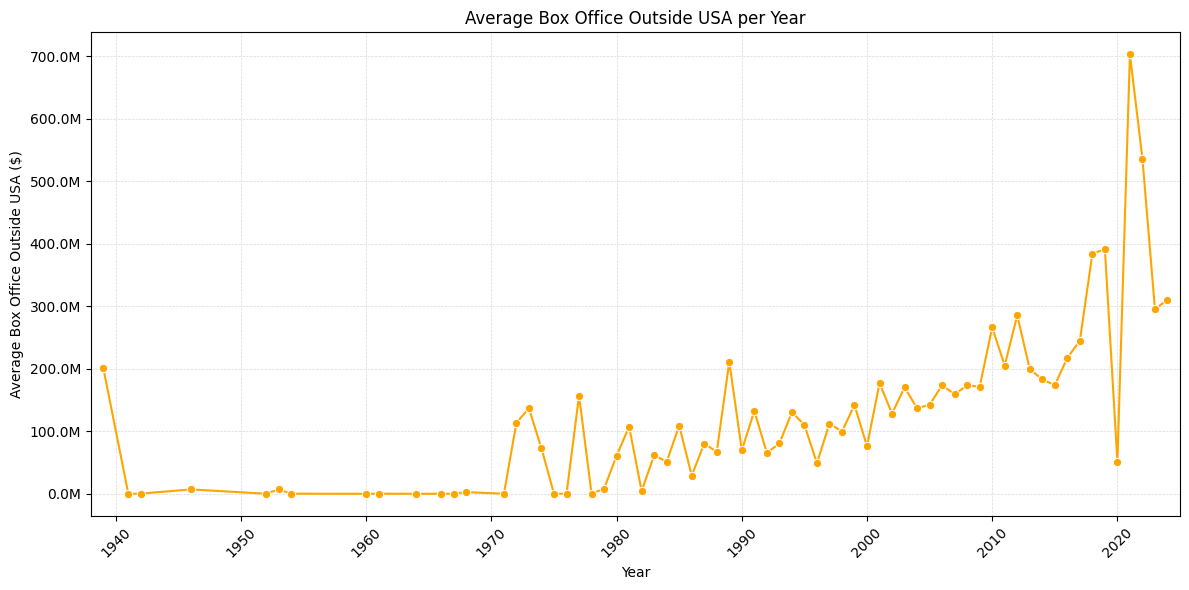

In [43]:
avg_boxoffice_outside_per_year = df.groupby('year')['boxoffice_outside_usa_in$'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=avg_boxoffice_outside_per_year, x='year', y='boxoffice_outside_usa_in$', marker='o', color='orange')

formatter = FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M')
ax.yaxis.set_major_formatter(formatter)

start, end = avg_boxoffice_outside_per_year['year'].min(), avg_boxoffice_outside_per_year['year'].max()
ticks = list(range(start - start % 10, end + 10, 10))
ax.set_xticks(ticks)

ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.xlim(1938, 2025)
plt.title('Average Box Office Outside USA per Year')
plt.xlabel('Year')
plt.ylabel('Average Box Office Outside USA ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ts_boxoffice_outsideUSA.png', dpi=300, bbox_inches='tight')
plt.show()

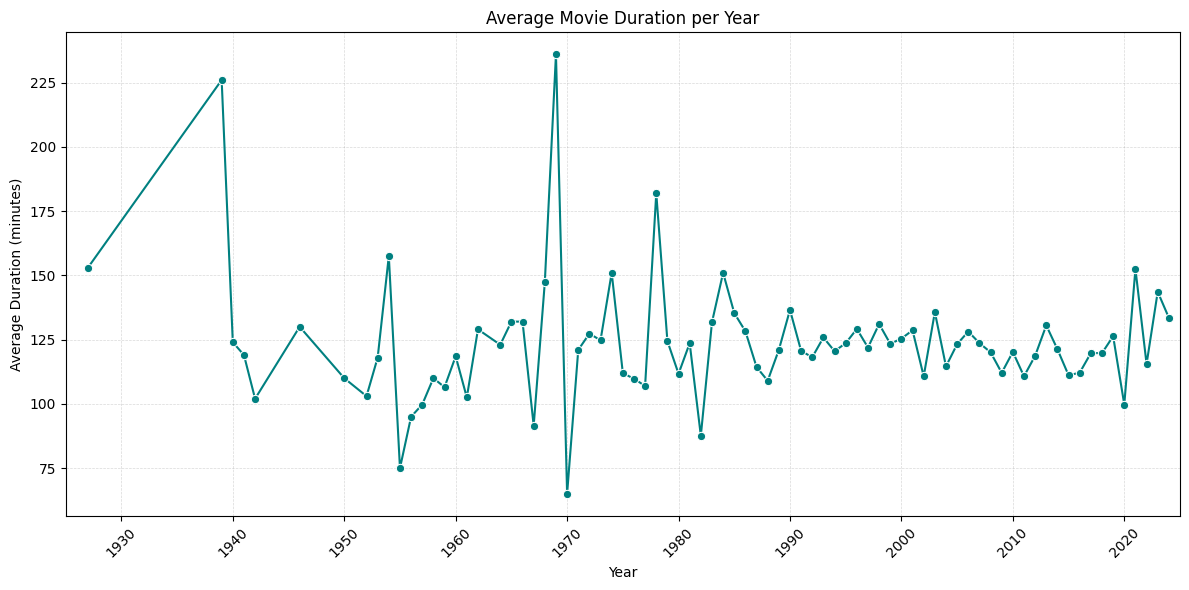

In [46]:
avg_duration_per_year = df.groupby('year')['duration_minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=avg_duration_per_year, x='year', y='duration_minutes', marker='o', color='teal')

start, end = avg_duration_per_year['year'].min(), avg_duration_per_year['year'].max()
ticks = list(range(start - start % 10, end + 10, 10))
ax.set_xticks(ticks)

plt.xlim(1925, 2025)
plt.title('Average Movie Duration per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)

ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig('ts_duration.png', dpi=300, bbox_inches='tight')
plt.show()

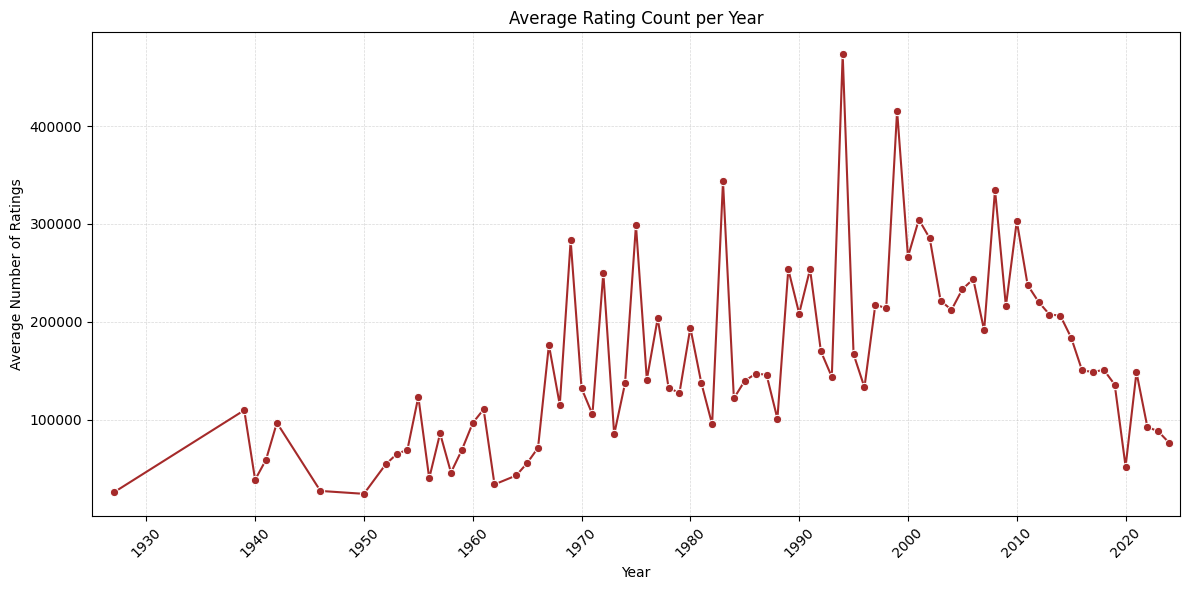

In [49]:
avg_rating_count_per_year = df.groupby('year')['rating_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=avg_rating_count_per_year, x='year', y='rating_count', marker='o', color='brown')

start, end = avg_rating_count_per_year['year'].min(), avg_rating_count_per_year['year'].max()
ticks = list(range(start - start % 10, end + 10, 10))
ax.set_xticks(ticks)

plt.xlim(1925, 2025)
plt.title('Average Rating Count per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Ratings')
plt.xticks(rotation=45)

ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig('ts_ratingcount.png', dpi=300, bbox_inches='tight')
plt.show()

As part of the exploratory data analysis, a boxplot of the ```duration_minutes``` variable was first generated to detect and assess the presence of outliers within the dataset. Subsequently, a histogram was plotted to visualize the overall distribution of movie durations, inclusive of these extreme values. To further investigate the underlying distribution without the distortion caused by outliers, a refined histogram was created after excluding outliers identified via the Interquartile Range (IQR) method. This comparative analysis facilitates a clearer understanding of the typical duration patterns and the impact of outliers on the data distribution.
Results below:

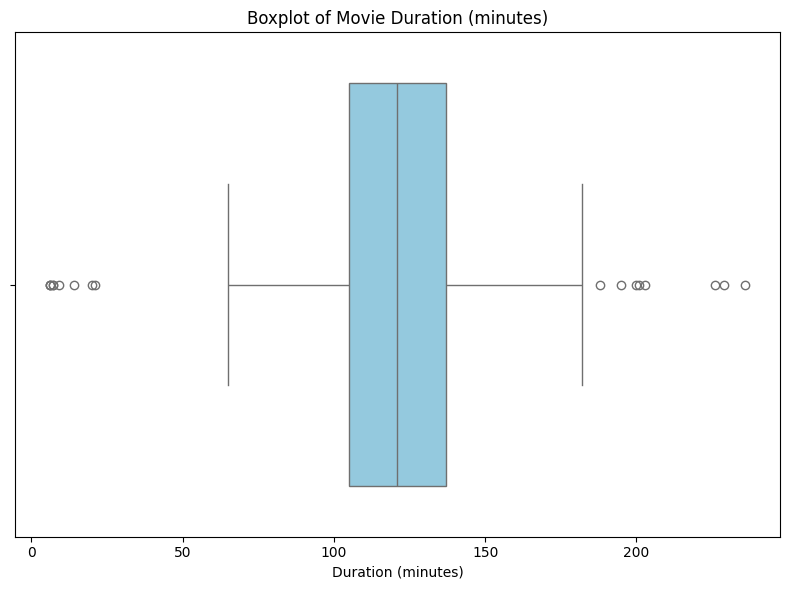

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['duration_minutes'], color='skyblue')

plt.title('Boxplot of Movie Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.tight_layout()
plt.savefig('ts_duration_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

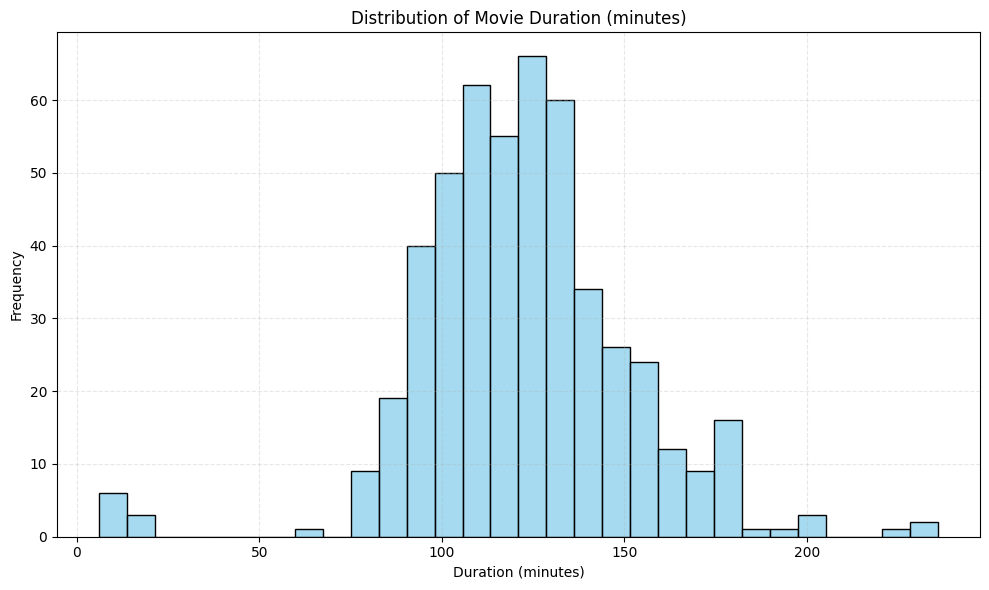

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration_minutes', bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of Movie Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('ts_duration_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

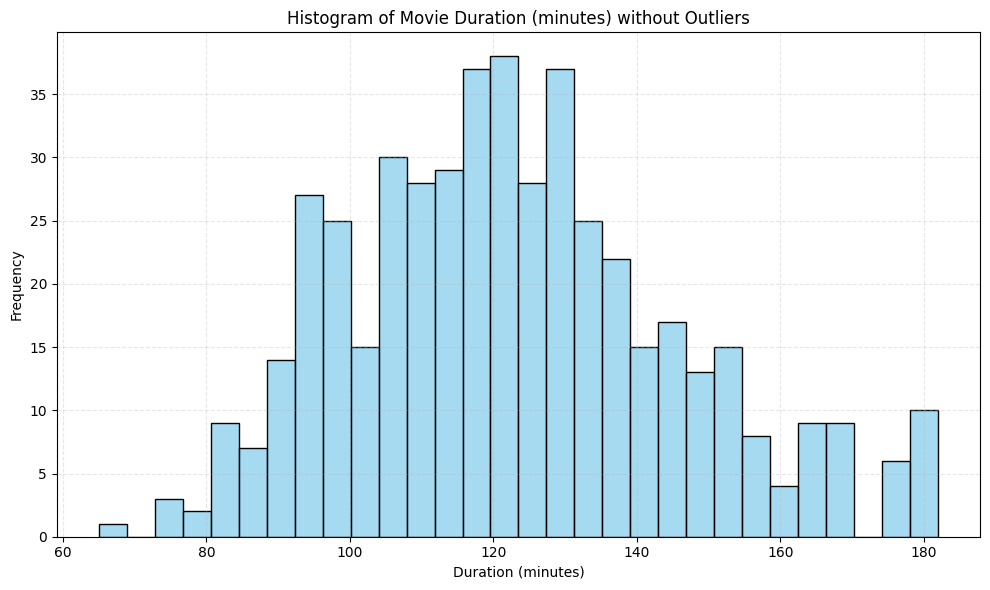

In [56]:
Q1 = np.percentile(df['duration_minutes'].dropna(), 25)
Q3 = np.percentile(df['duration_minutes'].dropna(), 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

duration_filtered = df['duration_minutes'][(df['duration_minutes'] >= lower_bound) & (df['duration_minutes'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(duration_filtered, bins=30, color='skyblue', edgecolor='black')

plt.title('Histogram of Movie Duration (minutes) without Outliers')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('ts_histogram_outliers.png', dpi=300, bbox_inches='tight')
plt.show()